<a href="https://colab.research.google.com/github/jadrsamara/Multimedia/blob/main/_Task_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task#1**
#Jad Samara 1170685
****
**Apply DCT to an image**

*Objective: To visualize the importance of applying DCT to an image by changing the least important coefficients to zero.*



# **Reading the image**
**1) Read an image into a matrix**

```
girl:
  high res:
    https://i.pinimg.com/originals/29/12/d1/2912d1ba7094c8a9ee48455e3be1b002.jpg
  low res:
    https://i.pinimg.com/236x/29/12/d1/2912d1ba7094c8a9ee48455e3be1b002.jpg

```

In [1]:
from PIL import Image
import requests
from io import BytesIO

file = requests.get("https://i.pinimg.com/1200x/fa/c0/b5/fac0b55c558212d228a12eafbc63790e.jpg")
img = Image.open(BytesIO(file.content)).convert('L')

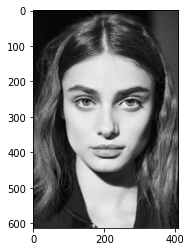

In [2]:
from matplotlib import pyplot as plt

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

Converting the image into a square (to avoid problems with spliting the image into blocks -for example 8*8 blocks)

width:	 409
height:	 613

new size:	 400 x 400


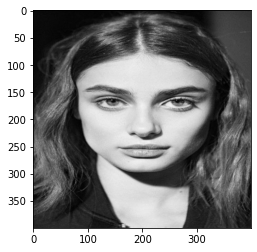

In [3]:
width, height = img.size
print("width:\t",width)
print("height:\t",height)

newSize = min(width,height)

newSize = round(newSize,-2)

print("\nnew size:\t",newSize,"x",newSize)

imgR = img.resize((newSize,newSize))
#img.resize((width,height))

plt.imshow(imgR, cmap='gray', vmin=0, vmax=255)
plt.show()

In [4]:
import numpy as np
from numpy import asarray

numpydata = asarray(imgR)
print("the image as an array of int",numpydata)

the image as an array of int [[ 9  9 10 ... 49 50 51]
 [11 11 12 ... 51 53 50]
 [10 10 10 ... 51 52 53]
 ...
 [41 45 39 ... 24 25 30]
 [36 40 35 ... 28 30 33]
 [38 42 37 ... 29 32 36]]


**2) Apply 2D-DCT to the matrix**

DCT functions:

In [5]:
from scipy import fftpack
import scipy

def get_2D_dct(img):
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')

def idct2(img):
    return scipy.fftpack.idct( scipy.fftpack.idct( img.T, norm='ortho').T, norm='ortho')

ZigZag function from the internet
traverces Matrices and saves it into an array


---


Inverse ZigZag function transforms array into a Matrix

In [6]:
import numpy as np

def zigzag(input):
    h = 0
    v = 0
    vmin = 0
    hmin = 0
    vmax = input.shape[0]
    hmax = input.shape[1]
    #print(vmax ,hmax )
    i = 0
    output = np.zeros(( vmax * hmax))
    while ((v < vmax) and (h < hmax)):
        if ((h + v) % 2) == 0:                 # going up     
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line
                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        
                i = i + 1
            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1
            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1
        else:                                    # going down
        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 
        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1
        		i = i + 1
        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1
        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break
    #print ('v:',v,', h:',h,', i:',i)
    return output

def inverse_zigzag(input, vmax, hmax):
	h = 0
	v = 0
	vmin = 0
	hmin = 0
	output = np.zeros((vmax, hmax))
	i = 0
	while ((v < vmax) and (h < hmax)): 
		if ((h + v) % 2) == 0:                 # going up
			if (v == vmin):
				output[v, h] = input[i]        # if we got to the first line
				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        
				i = i + 1
			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1
			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1
		else:                                    # going down
			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1       
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1  		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1
		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break

	return output
 

#**DCT on one block:**

First block:
 [[ 22  30  45  88 143 174 186 187]
 [187 188 192 195 191 185 185 185]
 [184 180 177 173 169 166 160 151]
 [153 158 147 130 125 122 115 111]
 [111 119 120 126 148 162 158 151]
 [148 145 140 135 136 127 103  59]
 [ 66  57  40  44  46  35  32  44]
 [ 43  44  40  37  22  25  29  34]]

DCT on First block:
 [[ 9.41250000e+02 -1.94187826e+01 -1.23002628e+01  2.20231486e+01
  -5.25000000e+00 -3.55633241e+00 -3.56420194e+00 -6.07705283e-01]
 [ 3.07222763e+02 -1.07944797e+02 -8.77588754e+00  5.83031719e+00
   1.42663220e-01 -1.21502035e+00  4.53686697e-01  2.55106048e+00]
 [-1.97003029e+02 -8.96785876e+01  8.29441738e+00 -4.86628462e+00
   1.38882057e+01  1.46262232e+00 -1.37804833e+00 -2.81384657e+00]
 [-1.14072059e+01 -9.13158670e+01 -2.42755232e+01  2.96901272e+01
  -3.38024042e+00 -2.61948603e+00 -2.93115207e+00  3.21278570e+00]
 [-1.15000000e+02 -1.03919067e+02  1.05549737e+01 -1.22309750e+00
  -5.50000000e+00 -4.97874079e+00  1.31054580e+00 -1.84897668e+00]
 [-1.31661951e+02 

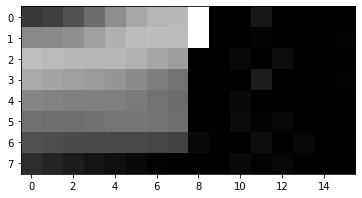

In [7]:
# 8*8 blocks
blockSize = 8
blocks = round(newSize/blockSize)

k = 50

#                                 50    50      8         8
numpydata2 = numpydata.reshape(blocks,blocks,blockSize,blockSize)

#number of blocks
#print(numpydata2.size/(blockSize*blockSize))

print("First block:\n",numpydata2[20][20])
dct = get_2D_dct(numpydata2[20][20])
print("\nDCT on First block:\n",dct)
#block = 
ar = zigzag(dct)
#zeros = np.zeros((blockSize,blockSize))

for i in range(len(ar)):
  if(i>(len(ar)-k-1)):
    ar[i] = 0

b = inverse_zigzag(ar,blockSize,blockSize)
print("\nZeroing on First block with k =",k," :\n",b)

invDct = idct2(b)

print("\nblock after reverse DCT on left, block after DCT on right:")
plt.imshow( np.hstack((invDct, dct)) , cmap='gray', vmin=0, vmax=255)
plt.show()


#**DCT, ZigZag and Zeroing Coefficients**

**3) Convert the last K coefficients to zero** (multiply the last (in zigzag scan) DCT-Coefficients by zeros while all other coefficients are left the same).

**4) Apply inverse 2D-DCT transform to the modified DCT coefficients.**

**5) Display the reconstructed image.**

**6) Repeat the procedure from 3 to 5 while changing the value of K.**

**7) Comment on your findings.**

All are done below:


In [8]:
arr = np.array(numpydata2)

k = 60

for m in range(blocks):
    for j in range(blocks):

      dct = get_2D_dct(numpydata2[m][j])

      ar = zigzag(dct)
      for i in range(len(ar)):
        if(i>(len(ar)-k)):
          ar[i] = 0
      revZig = inverse_zigzag(ar,blockSize,blockSize)
      
      arr[m][j] = idct2(revZig)

arr = arr.reshape(newSize, newSize)
imgR = Image.fromarray(arr)
imgR = imgR.resize((width,height))

arr2 = np.array(numpydata2)
k = 30
for m in range(blocks):
    for j in range(blocks):

      dct = get_2D_dct(numpydata2[m][j])

      ar = zigzag(dct)
      for i in range(len(ar)):
        if(i>(len(ar)-k)):
          ar[i] = 0
      revZig = inverse_zigzag(ar,blockSize,blockSize)
      
      arr2[m][j] = idct2(revZig)

arr2 = arr2.reshape(newSize, newSize)
imgR2 = Image.fromarray(arr2)
imgR2 = imgR2.resize((width,height))

arr3 = np.array(numpydata2)
k = 50
for m in range(blocks):
    for j in range(blocks):

      dct = get_2D_dct(numpydata2[m][j])

      ar = zigzag(dct)
      for i in range(len(ar)):
        if(i>(len(ar)-k)):
          ar[i] = 0
      revZig = inverse_zigzag(ar,blockSize,blockSize)
      
      arr3[m][j] = idct2(revZig)

arr3 = arr3.reshape(newSize, newSize)
imgR3 = Image.fromarray(arr3)
imgR3 = imgR3.resize((width,height))


# **Results:**

	Original	-->	k=30	-->	k=50	-->	k=60


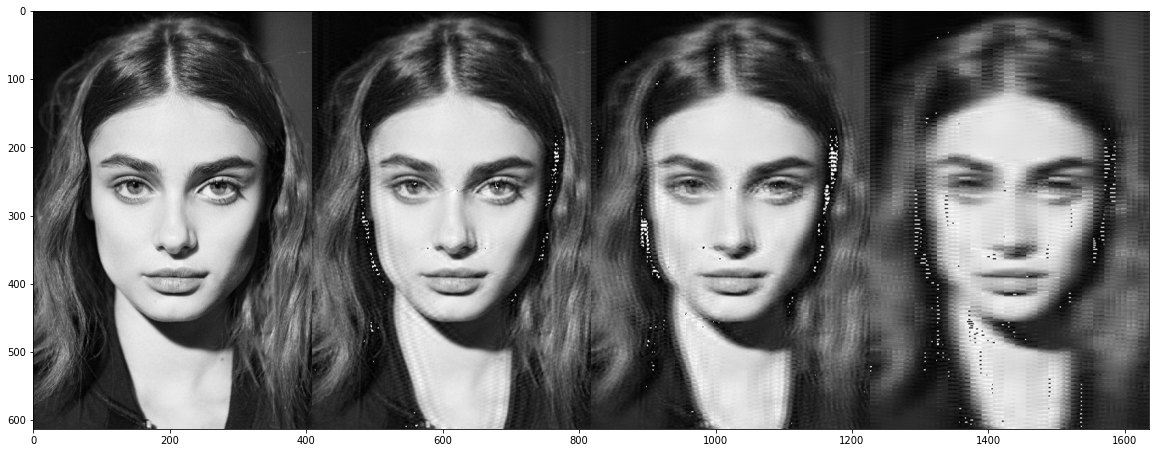

In [9]:
print("\tOriginal\t-->\tk=30\t-->\tk=50\t-->\tk=60")

plt.rcParams["figure.figsize"] = (20,10)
plt.imshow( np.hstack((img, imgR2, imgR3, imgR)) , cmap='gray', vmin=0, vmax=255)
plt.show()